In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [50]:
y = train_df.contract_status

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 36 columns):
id                           1060 non-null int64
Birth date                   1060 non-null object
Native city                  1047 non-null object
Gender                       1060 non-null object
Wave id                      1060 non-null int64
Level                        1060 non-null float64
Heard about school from      653 non-null object
Life status                  655 non-null object
day_00                       1060 non-null int64
day_01                       646 non-null float64
day_02                       1044 non-null float64
day_03                       1045 non-null float64
day_04                       1037 non-null float64
day_05                       1056 non-null float64
day_06                       1048 non-null float64
day_07                       1046 non-null float64
day_08                       1045 non-null float64
day_09                       1047 non-nu

In [52]:
print(f"class balance {1 - y.mean():.3f}")

class balance 0.134


In [53]:
test_df.shape[0] / (train_df.shape[0] + test_df.shape[0])

0.39977349943374857

### life status

In [54]:
train_df['Life status'] = train_df['Life status'].fillna('other')

In [58]:
y[train_df['Life status'] == 'work'].mean()

0.8771929824561403

In [59]:
y[train_df['Life status'] == 'study'].mean()

0.9191176470588235

In [60]:
y[train_df['Life status'] == 'other'].mean()

0.8357142857142857

## birthday

In [66]:
train_df['age'] = (2020 - pd.to_datetime(train_df['Birth date']).dt.year)

In [93]:
def age_cat(age):
    if age < 22:
        return 1
    if age < 27:
        return 2
    if age < 31:
        return 3
    if age > 45:
        return 5
    return 4

In [94]:
train_df['age_cat'] = train_df['age'].apply(age_cat)

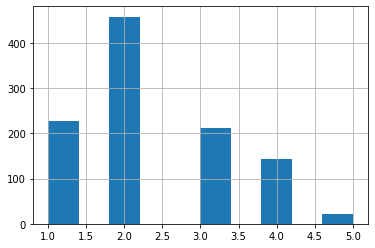

In [95]:
train_df['age_cat'].hist()

In [96]:
train_df[train_df['age_cat'] == 1]['contract_status'].mean()

0.8810572687224669

In [97]:
train_df[train_df['age_cat'] == 2]['contract_status'].mean()

0.8427947598253275

In [98]:
train_df[train_df['age_cat'] == 3]['contract_status'].mean()

0.8672985781990521

In [99]:
train_df[train_df['age_cat'] == 4]['contract_status'].mean()

0.8951048951048951

In [100]:
train_df[train_df['age_cat'] == 5]['contract_status'].mean()

1.0

## Native city

In [135]:
train_df['Native city'].fillna('другой').str.contains('Moscow').value_counts()

False    1022
True       38
Name: Native city, dtype: int64

## trash feats

In [14]:
drop_feats = ['day_00', 'day_01', 'day_02',
       'day_03', 'day_04', 'day_05', 'day_06', 'day_07', 'day_08', 'day_09',
       'day_10', 'day_11', 'day_12', 'day_13', 'evalexpr', 'match_n_match',
       'bsq', 'rush_00', 'rush_01', 'rush_02', 'exam_00', 'exam_01', 'exam_02','contract_status']

In [15]:
train_df['Heard about school from'].value_counts()

other              185
from_friends       182
vk_ads             100
from_21_student     56
google_ads          37
from_parents        34
facebook_ads        30
yandex_ads          20
from_teachers        9
Name: Heard about school from, dtype: int64

In [16]:
train_df['Life status'].fillna('other').value_counts()

other    560
study    272
work     228
Name: Life status, dtype: int64

In [178]:
train_df['Life status'].fillna('other')

0

In [154]:
X_train = train_df.drop(drop_feats, axis=1)

In [163]:
X_train['friend_in_school'] = (train_df['Heard about school from'] == 'from_21_student').astype(int)

In [131]:
train_df['contract_term'] = train_df['Contract termination date'].notnull()

In [162]:
X_train.corrwith(train_df.contract_status)

id                      0.020756
Wave id                 0.145564
Level                   0.318012
exam_final              0.091594
Memory entrance game   -0.017924
Logic entrance game     0.041606
friend_in_school        0.024832
dtype: float64

## Strange features

In [8]:
test_col = df['Contract termination date']

In [38]:
test_col = df[df['Contract termination date'].notnull()][['Contract termination date', 'contract_status']]

In [39]:
test_col['Contract termination date'] = pd.to_datetime(test_col['Contract termination date']).dt.date

In [110]:
test_col[test_col.contract_status != 0]

,Contract termination date,contract_status
116,2019-07-01,1
175,2019-10-07,1
181,2019-11-14,1
230,2019-09-19,1
274,2019-07-01,1
339,2019-12-15,1
341,2019-06-25,1
424,2019-11-17,1
509,2019-10-30,1
614,2019-11-06,1
